In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12
pd.set_option('display.max_columns', None)

## Load Database

In [4]:
# Connect to database and load full dataset
conn = sqlite3.connect('../databases/nhanes_1st.db')
df = pd.read_sql_query('SELECT * FROM raw_dataset', conn)
conn.close()
print(f"Dataset shape: {df.shape}")

Dataset shape: (56893, 29)


## Univariate Analysis

--- 1 Target Variable: Cardiovascular Disease Distribution ---


,Percentage (%)
has_cardiovascular_disease,
0.0,88.04
1.0,11.96


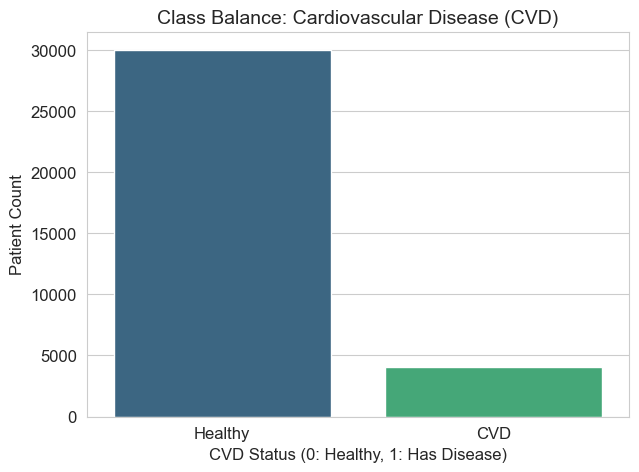


--- 2 Descriptive Statistics for Continuous Features ---


,count,mean,std,min,25%,50%,75%,max
age,56893.0,34.071485,25.270227,5.397605e-79,11.0,31.0,57.000000,80.0
body_mass_index,47424.0,26.443765,8.188407,1.110000e+01,20.4,25.6,31.100000,92.3
cholesterol_mg_dl,39336.0,179.510703,41.066287,6.200000e+01,150.0,175.0,204.000000,813.0
heart_rate_bpm,37178.0,73.118605,12.344447,3.400000e+01,64.0,72.0,80.666667,180.0
hemoglobin_g_dl,43938.0,13.693971,1.500680,5.400000e+00,12.7,13.6,14.700000,19.9


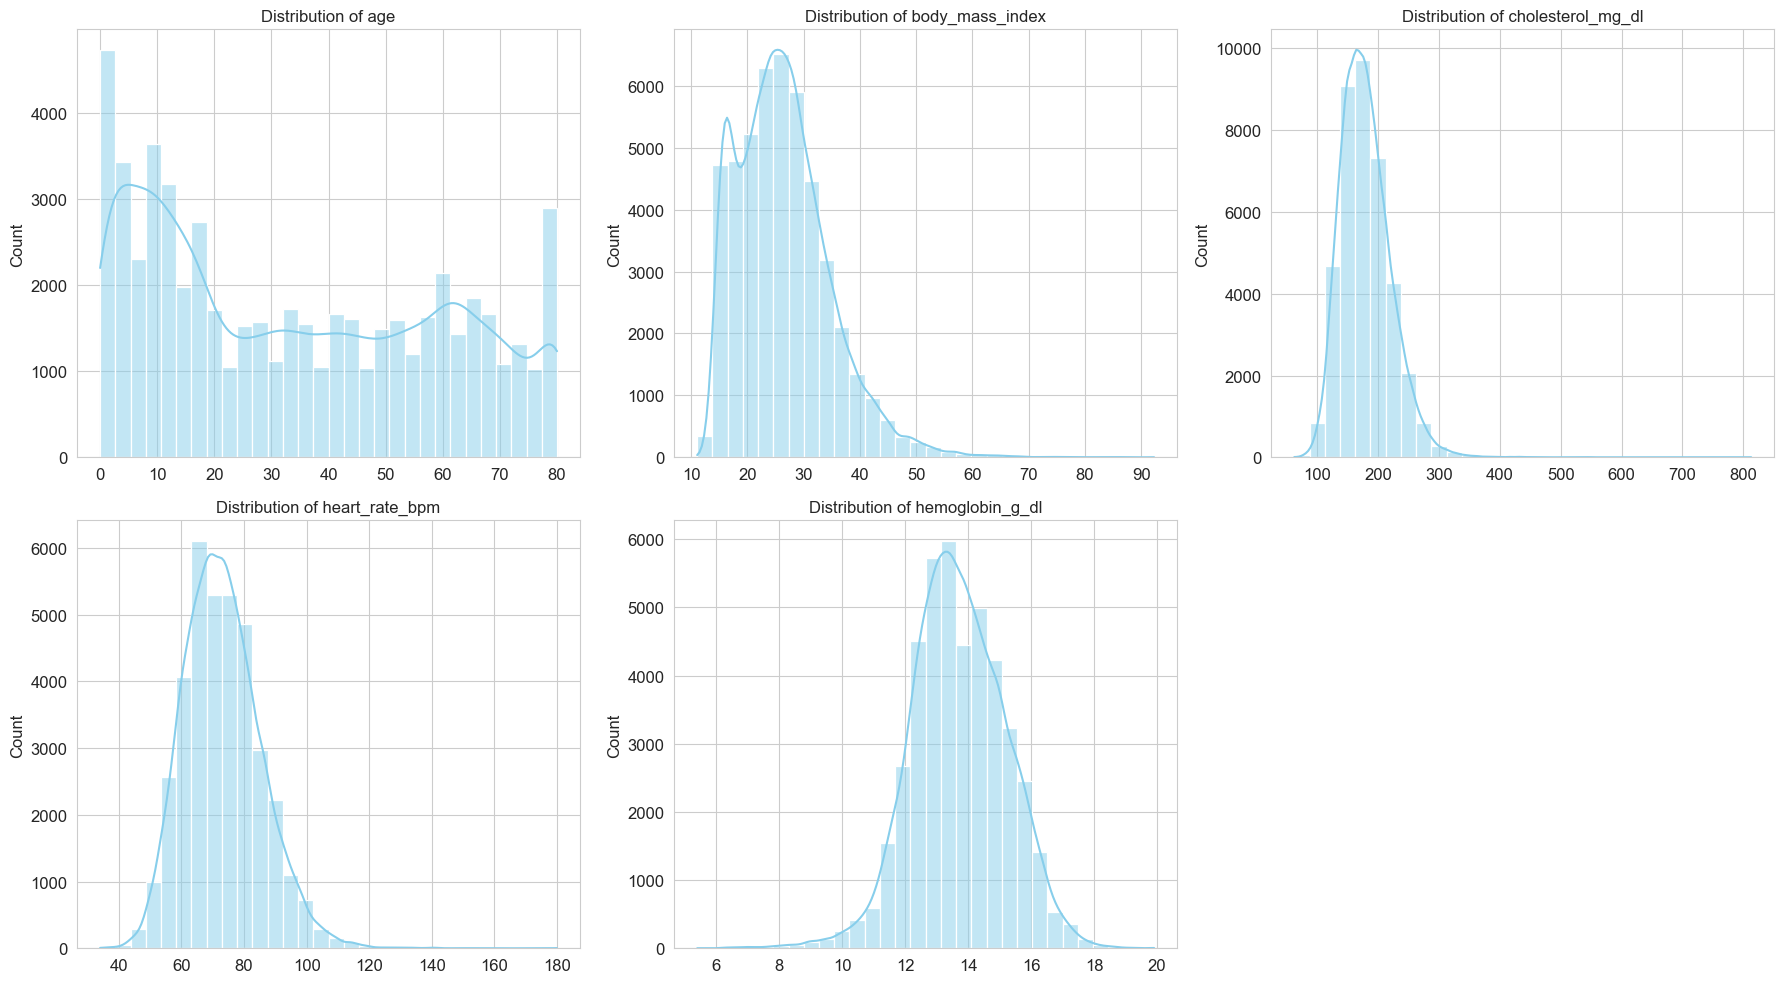


--- 3 Lifestyle Feature: Smoking Status ---


,Percentage (%)
smoking_status,
3.0,57.03
1.0,33.72
2.0,9.25


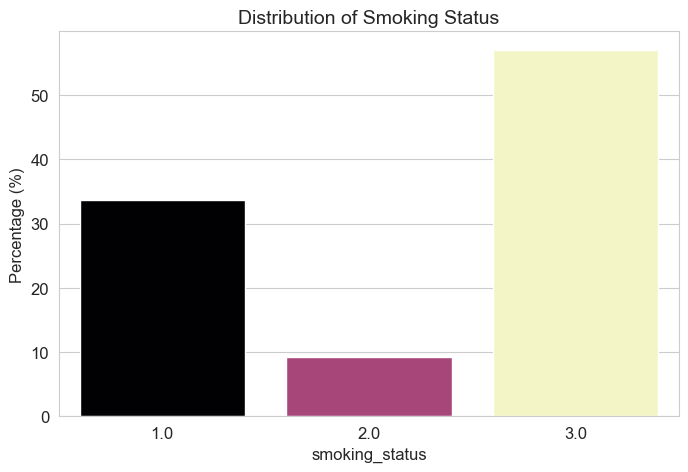

In [ ]:
# 1 Target Variable Analysis (CVD Status)
# Understanding if the dataset is balanced or imbalanced
print("--- 1 Target Variable: Cardiovascular Disease Distribution ---")
target_counts = df['has_cardiovascular_disease'].value_counts(normalize=True).mul(100).round(2)
display(target_counts.to_frame(name='Percentage (%)'))

plt.figure(figsize=(7, 5))
sns.countplot(
    x='has_cardiovascular_disease', 
    data=df, 
    palette='viridis', 
    hue='has_cardiovascular_disease', 
    legend=False
)
plt.title('Class Balance: Cardiovascular Disease (CVD)', fontsize=14)
plt.xlabel('CVD Status (0: Healthy, 1: Has Disease)')
plt.ylabel('Patient Count')
plt.xticks([0, 1], ['Healthy', 'CVD'])
plt.show()

# 2 Continuous Features Analysis
# Checking for skewness and range in clinical markers
print("\n--- 2 Descriptive Statistics for Continuous Features ---")
continuous_cols = ['age', 'body_mass_index', 'cholesterol_mg_dl', 'heart_rate_bpm', 'hemoglobin_g_dl']
display(df[continuous_cols].describe().T)

plt.figure(figsize=(18, 10))
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')

plt.tight_layout()
plt.show()

# 3 Categorical Feature Analysis (Smoking Status)
print("\n--- 3 Lifestyle Feature: Smoking Status ---")
smoking_dist = df['smoking_status'].value_counts(normalize=True).mul(100).round(2)
display(smoking_dist.to_frame(name='Percentage (%)'))

plt.figure(figsize=(8, 5))
sns.barplot(
    x=smoking_dist.index, 
    y=smoking_dist.values, 
    palette='magma', 
    hue=smoking_dist.index, 
    legend=False
)
plt.title('Distribution of Smoking Status', fontsize=14)
plt.ylabel('Percentage (%)')
plt.show()